In [1]:
import panel as pn
from awesome_panel_extensions.widgets.perspective_viewer import PerspectiveViewer # Please note you need to import extensions before you run pn.extension("perspective")

# Expected to work for Panel >= 0.10
# C.f. https://github.com/holoviz/panel/issues/1529#event-3682125861
# pn.extension("perspective") 

# Works for Panel < 0.10
PerspectiveViewer.config()
pn.extension()

from awesome_panel_extensions.awesome_panel import notebook
notebook.Header(folder="examples/reference/widgets", notebook="PerspectiveViewer.ipynb")

Header(sizing_mode='stretch_width')
    [0] Row(sizing_mode='stretch_width')
        [0] PanelLinkButton(str, image_url='https://panel.holoviz.org..., style={'background': 'black', ...}, theme='dark', width=140)
        [1] BinderLinkButton(str, branch='master', folder='examples/reference/widget..., link_url='https://mybinder.org/v2/g..., notebook='PerspectiveViewer.ipynb', repository='marcskovmadsen/awesome-pa...)
        [2] NBViewerLinkButton(str, branch='master', folder='examples/reference/widget..., link_url='https://nbviewer.jupyter...., notebook='PerspectiveViewer.ipynb', repository='marcskovmadsen/awesome-pa...)
        [3] Style(str, container_width='90%')
    [1] Markdown(str, sizing_mode='stretch_width')

# PerspectiveViewer - Reference Guide

[Perspective](https://github.com/finos/perspective) ships with the `PerspectiveViewer`, which is an awesome **interactive Pivot Table + Chart** webcomponent.  You can even use it for **streaming analytics**.

<img src="https://raw.githubusercontent.com/MarcSkovMadsen/awesome-panel-extensions/master/assets/videos/perspective-viewer-finos.gif" style="max-height:400px">

The `PerspectiveViewer` enables the use of the `perspective-viewer` webcomponent in Panel.

#### Parameters:

* **``value``** (DataFrame): The data loaded to the viewer.


* **``plugin``** (str): Determines how to display the data. One of `hypergrid`, `datagrid`, `d3_y_bar`, `d3_x_bar`, `d3_y_line`, `d3_y_area`, `d3_y_scatter`, `d3_xy_scatter`, `d3_treemap`, `d3_sunburst`, `d3_heatmap`, `d3_candlestick`, `d3_ohlc`.
* **``theme``** (str): Determines the style. One of `material` (default), `material-dark`, `material-dense`, `material-dense-dark`, `vaporwave`.


* **``columns``** (list): A list of source columns to show as columns. For example `["x", "y"]`.
* **``columns_computed``** (list): A list of computed columns. For example ["\\"x\\"+\\"y\\""].
* **``columns_pivot``** (list): A list of source columns to pivot by. For example `["x", "y"]`.
* **``rows_pivot``** (list): A list of source columns to group by. For example `["x", "y"]`.
* **``aggregates``** (dict): How to aggregate. For example `{x: "distinct count"}`.
* **``sort``** (list): How to sort. For example `[["x","desc"]]`.
* **``filter``** (list): How to filter. For example `[["x", "<", 3],["y", "contains", "abc"]]`.

#### Functions

* **``stream``**. Streams (appends) the `stream_value` provided to the existing `value` in an efficient manner and triggers a value changed event.
* **``patch``**. Patches (updates) the existing value with the `patch_value` in an efficient manner and triggers a value changed event.

The `PerspectiveViewer` has the same layout and styling parameters as most other widgets. For example `width` and `sizing_mode`.

___

Let's start by importing the **dependencies**

In [2]:
import param
import pandas as pd
import panel as pn
import time

DARK_BACKGROUND = "rgb(42, 44, 47)"
DARK_COLOR = "white"
PERSPECTIVE_LOGO = "https://perspective.finos.org/img/logo.png"
PANEL_LOGO = "https://panel.holoviz.org/_static/logo_horizontal.png"

Let's load **S&P500 financials data**

In [3]:
# Source: https://datahub.io/core/s-and-p-500-companies-financials
DATA = "https://raw.githubusercontent.com/MarcSkovMadsen/awesome-panel/master/application/pages/awesome_panel_express_tests/PerspectiveViewerData.csv"
dataframe = pd.read_csv(DATA)

Let's create a **PerspectiveViewer app** to display the data

In [4]:
dataframe.columns

Index(['Symbol', 'Name', 'Sector', 'Price', 'Price/Earnings', 'Dividend Yield',
       'Earnings/Share', '52 Week Low', '52 Week High', 'Market Cap', 'EBITDA',
       'Price/Sales', 'Price/Book', 'SEC Filings'],
      dtype='object')

Column(height=800, sizing_mode='stretch_width')
    [0] Markdown(str)
    [1] Row(background='rgb(42, 44, 47)')
        [0] PNG(str, height=50, margin=(10, 25, 10, 10))
        [1] HSpacer()
    [2] Row(background='rgb(42, 44, 47)', sizing_mode='stretch_both')
        [0] PerspectiveViewer(_source=ColumnDataSource(id='1011'..., _source_patch=ColumnDataSource(id='1009'..., _source_stream=ColumnDataSource(id='1010'..., columns=['Name', 'Symbol', ...], sizing_mode='stretch_both', theme='material-dark', value=    Symbol    ...)
        [1] VSpacer(width=10)
        [2] WidgetBox(background='#9E9E9E')
            [0] Param(PerspectiveViewer, parameters=['theme', 'row_pivots', ...], sizing_mode='stretch_height', width=200)
    [3] HSpacer(height=50)
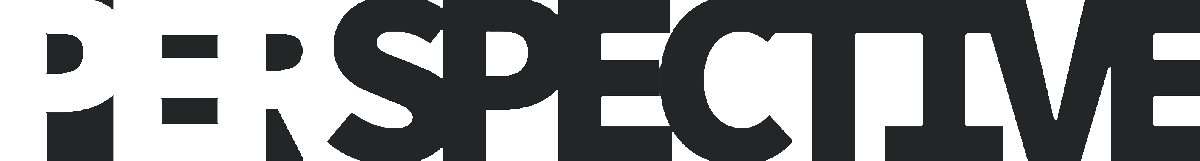

In [5]:
COLUMNS = [
    "Name",
    "Symbol",
    "Sector",
    "Price",
    "52 Week Low",
    "52 Week High",
    "Price/Earnings",
    "Price/Sales",
    "Price/Book",
    "Dividend Yield",
    "Earnings/Share",
    "Market Cap",
    "EBITDA",
    "SEC Filings",
]
perspective_viewer = PerspectiveViewer(
    value=dataframe,
    theme="material-dark",
    columns=COLUMNS,
    sizing_mode="stretch_both",)

top_app_bar = pn.Row(
    pn.pane.PNG(PERSPECTIVE_LOGO, height=50, margin=(10, 25, 10, 10)),
    pn.layout.HSpacer(),
    margin=0,
    background=DARK_BACKGROUND,
)

settings_parameters = [
    "theme",
    "row_pivots",
    "plugin",
    "columns",
    "aggregates",
    "filters",
    "sort",
    "rows",
    "column_pivots",
]

settings_pane = pn.WidgetBox(pn.Param(
    perspective_viewer,
    parameters=settings_parameters,
    width=200,
    sizing_mode="stretch_height",
),background="#9E9E9E",)

app = pn.Column(
    pn.pane.Markdown(__doc__),
    top_app_bar,
    pn.Row(
        perspective_viewer,
        pn.layout.VSpacer(width=10),
        settings_pane,
        sizing_mode="stretch_both",
        margin=0,
        background=DARK_BACKGROUND,
    ),
    pn.layout.HSpacer(height=50),
    height=800, sizing_mode="stretch_width",
)

app

**Click the three dots in the upper left corner** to start the interactive exploration!

## Streaming and Patching

The `PerspectiveViewer` supports streaming (i.e. appending) and patching (i.e. updating) data via dedicated, efficient methods

Let's try it out on a small example

Column(sizing_mode='stretch_width')
    [0] Row(background='rgb(42, 44, 47)')
        [0] PNG(str, height=50, margin=(10, 25, 10, 10))
        [1] HSpacer()
    [1] Row(sizing_mode='stretch_width')
        [0] PerspectiveViewer(_source=ColumnDataSource(id='1083'..., _source_patch=ColumnDataSource(id='1081'..., _source_stream=ColumnDataSource(id='1082'..., columns=['index', 'x', ...], height=500, plugin='d3_xy_scatter', sizing_mode='stretch_width', value=   x  y      z...)
        [1] WidgetBox
            [0] Button(button_type='success', name='STREAM')
            [1] Button(name='PATCH')
            [2] Button(name='RESET')
    [2] DataFrame(name='Value', value=   x  y      z...)
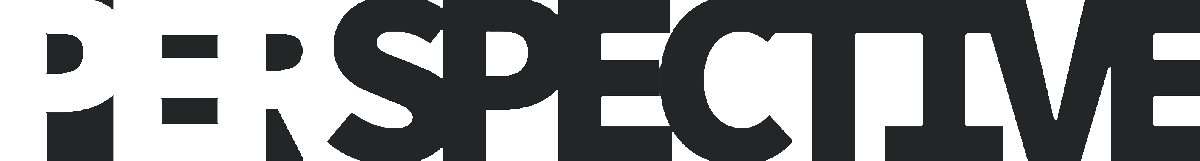

In [6]:
SHOW_HTML = True
# pn.config.sizing_mode = "stretch_width"
data = [
    {"x": 1, "y": "a", "z": True},
    {"x": 2, "y": "b", "z": False},
    {"x": 3, "y": "c", "z": True},
    {"x": 4, "y": "d", "z": False},
]
dataframe = pd.DataFrame(data)
perspective = PerspectiveViewer(
    height=500, value=dataframe.copy(deep=True), columns=["index", "x", None, None,None], plugin="d3_xy_scatter", sizing_mode="stretch_width"
)
import random

def stream(*events):
    new_index = perspective.value.index.max()
    new_data = {"x": [random.uniform(-3, new_index)], "y": ["e"], "z": [True]}
    new_series = pd.DataFrame(data=new_data)
    perspective.stream(new_series)

stream_button = pn.widgets.Button(name="STREAM", button_type="success")
stream_button.on_click(stream)

def patch(*events):
    new_value = perspective.value.copy(deep=True)
    new_value["x"]=new_value["x"]-1
    new_value["z"]=~new_value["z"]
    perspective.patch(new_value)

patch_button = pn.widgets.Button(name="PATCH", button_type="default")
patch_button.on_click(patch)

def reset(*events):
    perspective.value = dataframe.copy(deep=True)

reset_button = pn.widgets.Button(name="RESET", button_type="default")
reset_button.on_click(reset)

pn.Column(
    top_app_bar,
    pn.Row(
        perspective,
        pn.WidgetBox(stream_button, patch_button, reset_button),
        sizing_mode="stretch_width",
    ),
    perspective.param.value,
    sizing_mode="stretch_width"
)

## Known Issues

- In the Streaming Example above (and only in the notebook) the Perspective viewer does not visually update if `perspective.param.value` is removed from the app.

## Roadmap

- Fix Known Issues
- Support other Dataframe types than Pandas.
- Improve implementation of streaming and patching. Currently the perspective-viewer webcomponent loads all data from scratch.
- Get this included in the Panel package.

## Resources

- [Perspective Github](https://github.com/finos/perspective)
- [Perspective IPyWidget Docs](https://perspective-python.readthedocs.io/en/latest/quickstart.html)